In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
!ls ../out

1_moreout.out  3_moreout.out  output_aCM.csv   output_SLATM.csv
2_moreout.out  4_moreout.out  output_FCHL.csv  output_SOAP.csv


In [4]:
acm_out = pd.read_csv("../out/output_aCM.csv", index_col=0)

In [5]:
acm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments
0,1,"['qm7_3871', 'qm7_49']","[[], [6, 6]]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (5, 6), (2, ..."
1,2,"['qm7_3871', 'qm7_49']","[[], [6, 6]]",29874.0,49874.0,"[[(3, 2), (1, 3), (4, 4), (6, 5), (2, 6), (5, ..."
2,3,"['qm7_3871', 'qm7_49']","[[], [6, 6]]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (2, 6), (5, ..."
3,4,"['qm7_3871', 'qm7_49']","[[], [6, 6]]",29874.0,49874.0,"[[(3, 2), (1, 3), (4, 4), (6, 5), (5, 6), (2, ..."
4,5,"['qm7_3871', 'qm7_49']","[[], [6, 6]]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (5, 6), (2, ..."
...,...,...,...,...,...,...
995,996,"['qm7_4031', 'qm7_52']","[[], [6, 6]]",31011.0,51011.0,"[[(2, 2), (3, 3), (4, 4), (6, 5), (7, 6), (5, ..."
996,997,"['qm7_4031', 'qm7_52']","[[], [6, 6]]",31011.0,51011.0,"[[(1, 2), (6, 3), (4, 4), (3, 5), (7, 6), (5, ..."
997,998,"['qm7_3966', 'qm7_49']","[[], [6, 6]]",31027.0,51027.0,"[[(2, 2), (7, 3), (3, 4), (5, 5), (6, 6), (4, ..."
998,999,"['qm7_3966', 'qm7_49']","[[], [6, 6]]",31027.0,51027.0,"[[(2, 2), (7, 3), (3, 4), (5, 5), (6, 6), (4, ..."


In [6]:
from ast import literal_eval 

In [7]:
acm_out["Fragments"] = acm_out["Fragments"].apply(literal_eval)

In [8]:
acm_out["Sorted Fragments"] = acm_out["Fragments"].apply(lambda x:sorted(x))

In [9]:
len(np.unique(acm_out["Sorted Fragments"]))

150

In [58]:
# excess is missing Hs - to fix 

In [10]:
import qml

In [11]:
qm9_mol = qml.Compound("../targets/qm9_0.xyz")
qm9_ncharges = qm9_mol.nuclear_charges

In [12]:
qm9_ncharges

array([8, 6, 6, 7, 6, 8, 8, 7, 6, 1, 1])

In [13]:
def count_ncharges(list_ncharges, elements=[1,6,7,8,16]):
    ncharge_count = np.zeros(len(elements))
    for ncharge in list_ncharges:
        for i, elem in enumerate(elements):
            if ncharge == elem:
                ncharge_count[i] += 1
    return ncharge_count

In [14]:
qm9_counts = count_ncharges(qm9_ncharges)

In [15]:
qm9_counts

array([2., 4., 2., 3., 0.])

In [16]:
def get_excess_frags(frag_list):
    mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in frag_list]
    ncharges = np.concatenate([mol.nuclear_charges for mol in mols])
    ncharge_count = count_ncharges(ncharges)
    
    diff_count = ncharge_count - qm9_counts
    excess = [[ncharge]*int(count) for ncharge, count in zip([1,6,7,8,16], diff_count)]
    return np.concatenate(excess)

In [17]:
get_excess_frags(['qm7_1107', 'qm7_5455'])

array([1., 1., 1., 1., 1., 1., 1., 1., 6., 6., 6., 6.])

In [18]:
acm_out["Excess"] = acm_out["Fragments"].apply(get_excess_frags)

In [19]:
acm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments
0,1,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (5, 6), (2, ...","[qm7_3871, qm7_49]"
1,2,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (1, 3), (4, 4), (6, 5), (2, 6), (5, ...","[qm7_3871, qm7_49]"
2,3,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (2, 6), (5, ...","[qm7_3871, qm7_49]"
3,4,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (1, 3), (4, 4), (6, 5), (5, 6), (2, ...","[qm7_3871, qm7_49]"
4,5,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (5, 6), (2, ...","[qm7_3871, qm7_49]"
...,...,...,...,...,...,...,...
995,996,"[qm7_4031, qm7_52]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31011.0,51011.0,"[[(2, 2), (3, 3), (4, 4), (6, 5), (7, 6), (5, ...","[qm7_4031, qm7_52]"
996,997,"[qm7_4031, qm7_52]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31011.0,51011.0,"[[(1, 2), (6, 3), (4, 4), (3, 5), (7, 6), (5, ...","[qm7_4031, qm7_52]"
997,998,"[qm7_3966, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31027.0,51027.0,"[[(2, 2), (7, 3), (3, 4), (5, 5), (6, 6), (4, ...","[qm7_3966, qm7_49]"
998,999,"[qm7_3966, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31027.0,51027.0,"[[(2, 2), (7, 3), (3, 4), (5, 5), (6, 6), (4, ...","[qm7_3966, qm7_49]"


In [20]:
# get energies
# qm7 energies are in qm7 dir 
# need qm9 energies and excess contribution

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# need ncharges list and list of energies

In [23]:
import qml

In [24]:
qm7 = pd.read_csv("../qm7/energies.csv", index_col=0)
files = qm7["file"].to_list()

In [25]:
mols = [qml.Compound("../qm7/xyz/"+x+".xyz") for x in files]

In [26]:
ncharges = [mol.nuclear_charges for mol in mols]

In [27]:
# ncharges convert to count
elements = [1, 6, 7, 8, 16]
ncharge_counts = []
for ncharge_list in ncharges: 
    ncharge_count = count_ncharges(ncharge_list)
    ncharge_counts.append(ncharge_count)

In [28]:
energies = qm7["energy / Ha"].to_list()

In [29]:
reg = LinearRegression().fit(ncharge_counts, energies)

In [30]:
reg.score(ncharge_counts, energies)

0.9999998316921461

In [31]:
coeff_energies = reg.coef_

In [32]:
coeff_energies

array([  -0.61002842,  -38.01906467,  -54.64773278,  -75.09076869,
       -397.94238855])

In [33]:
coeff_energies = dict(zip(elements, coeff_energies))

In [34]:
def match_file_to_energy(filename):
    energies = pd.read_csv("../qm7/energies.csv")
    energy = energies.loc[energies["file"] == filename]["energy / Ha"]
    return float(energy)

In [35]:
def get_excess_energy(excess_ncharges):
    energy = np.sum([coeff_energies[x] for x in excess_ncharges])
    return energy

In [36]:
def get_reaction_energy(fragment_list, excess_ncharges):
    qm9_energy = -487.817450280942 # Ha
    
    excess_energy = get_excess_energy(excess_ncharges)
    
    frag_energies = np.sum([match_file_to_energy(x) for x in fragment_list])
    
    rxn_energy = frag_energies - qm9_energy - excess_energy
    return rxn_energy

In [37]:
acm_out["energies / Ha"] = acm_out.apply(lambda x: get_reaction_energy(x["Fragments"], x["Excess"]), axis=1)

In [38]:
acm_out["energies / kcal/mol"] = acm_out["energies / Ha"] * 627.5

In [39]:
acm_out

,SolN,Fragments,Excess,ObjValNoPen,ObjValWithPen,Assignments,Sorted Fragments,energies / Ha,energies / kcal/mol
0,1,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (5, 6), (2, ...","[qm7_3871, qm7_49]",0.069794,43.795422
1,2,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (1, 3), (4, 4), (6, 5), (2, 6), (5, ...","[qm7_3871, qm7_49]",0.069794,43.795422
2,3,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (2, 6), (5, ...","[qm7_3871, qm7_49]",0.069794,43.795422
3,4,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (1, 3), (4, 4), (6, 5), (5, 6), (2, ...","[qm7_3871, qm7_49]",0.069794,43.795422
4,5,"[qm7_3871, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 6.0]",29874.0,49874.0,"[[(3, 2), (7, 3), (4, 4), (6, 5), (5, 6), (2, ...","[qm7_3871, qm7_49]",0.069794,43.795422
...,...,...,...,...,...,...,...,...,...
995,996,"[qm7_4031, qm7_52]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31011.0,51011.0,"[[(2, 2), (3, 3), (4, 4), (6, 5), (7, 6), (5, ...","[qm7_4031, qm7_52]",0.054490,34.192241
996,997,"[qm7_4031, qm7_52]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31011.0,51011.0,"[[(1, 2), (6, 3), (4, 4), (3, 5), (7, 6), (5, ...","[qm7_4031, qm7_52]",0.054490,34.192241
997,998,"[qm7_3966, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31027.0,51027.0,"[[(2, 2), (7, 3), (3, 4), (5, 5), (6, 6), (4, ...","[qm7_3966, qm7_49]",-0.011013,-6.910682
998,999,"[qm7_3966, qm7_49]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, ...",31027.0,51027.0,"[[(2, 2), (7, 3), (3, 4), (5, 5), (6, 6), (4, ...","[qm7_3966, qm7_49]",-0.011013,-6.910682


In [46]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

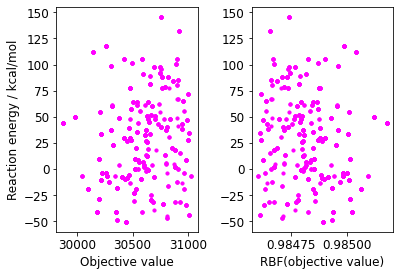

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(acm_out["ObjValNoPen"], acm_out["energies / kcal/mol"], s=10, color='magenta')
ax[0].set_xlabel("Objective value")
ax[0].set_ylabel("Reaction energy / kcal/mol")

x = np.exp(-acm_out["ObjValNoPen"]/(2*1000**2))
ax[1].scatter(x, acm_out["energies / kcal/mol"], s=10, color='magenta')
ax[1].set_xlabel("RBF(objective value)")

plt.tight_layout()
plt.savefig("../figures/correlation-aCM.png", dpi=300)
plt.show()